In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [48]:
#uvoz skupa podataka

In [49]:
df = pd.read_csv('../freMTPL2freq.csv')
df = df.sample(n=50000, random_state=42)
df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
261354,2122523.0,0,0.43,D,7,18,36,95,B1,Regular,1054,R24
448143,3173420.0,0,0.10,D,7,17,80,95,B2,Regular,598,R25
188618,1188619.0,0,0.33,E,7,3,36,76,B6,Regular,4172,R82
12952,31400.0,0,0.56,A,5,4,73,52,B13,Diesel,15,R24
425028,3138755.0,0,0.27,E,8,0,37,50,B11,Diesel,3021,R53


In [50]:
df.tail()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
582367,4173545.0,0,1.00,D,7,15,61,68,B1,Regular,634,R53
528920,4120098.0,0,1.00,C,6,9,62,50,B1,Diesel,111,R24
527242,4118420.0,0,0.16,E,9,12,39,62,B3,Regular,3963,R91
324114,2257259.0,0,0.08,E,5,4,59,72,B2,Regular,3866,R24
652208,6049033.0,0,0.02,E,4,3,26,72,B12,Regular,2740,R22


In [51]:
df.shape

(50000, 12)

In [52]:
#Informacije

df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 261354 to 652208
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IDpol       50000 non-null  float64
 1   ClaimNb     50000 non-null  int64  
 2   Exposure    50000 non-null  float64
 3   Area        50000 non-null  object 
 4   VehPower    50000 non-null  int64  
 5   VehAge      50000 non-null  int64  
 6   DrivAge     50000 non-null  int64  
 7   BonusMalus  50000 non-null  int64  
 8   VehBrand    50000 non-null  object 
 9   VehGas      50000 non-null  object 
 10  Density     50000 non-null  int64  
 11  Region      50000 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 5.0+ MB
(50000, 12)


In [53]:
#Nazivi kolona

df.columns

Index(['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region'],
      dtype='object')

In [54]:
df.dtypes

IDpol         float64
ClaimNb         int64
Exposure      float64
Area           object
VehPower        int64
VehAge          int64
DrivAge         int64
BonusMalus      int64
VehBrand       object
VehGas         object
Density         int64
Region         object
dtype: object

In [55]:
df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,2.631968e+06,0.051740,0.527685,6.467920,7.03714,45.503720,59.722520,1769.780940
std,1.643943e+06,0.235338,0.364206,2.062168,5.64776,14.136784,15.634594,3894.234672
min,1.500000e+01,0.000000,0.002732,4.000000,0.00000,18.000000,50.000000,2.000000
25%,1.160296e+06,0.000000,0.170000,5.000000,2.00000,34.000000,50.000000,92.000000
50%,2.274557e+06,0.000000,0.490000,6.000000,6.00000,44.000000,50.000000,393.000000
75%,4.045501e+06,0.000000,0.980000,7.000000,11.00000,55.000000,64.000000,1629.000000
max,6.114323e+06,4.000000,2.010000,15.000000,100.00000,99.000000,195.000000,27000.000000


In [56]:
df.isna().sum()

IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
dtype: int64

In [57]:
#Brisanje duplikata

df.drop_duplicates(inplace=True)

In [58]:
# Brisanje ID kolone jer nema predikativnu vrednost
if 'IDpol' in df.columns:
    df = df.drop(columns=['IDpol'])

In [59]:
#Pregled godina starosti osiguraonika

unique_years = sorted(df['DrivAge'].unique())
print(unique_years)

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99]


In [60]:
df['ClaimNb'].value_counts()

ClaimNb
0    47560
1     2303
2      128
3        8
4        1
Name: count, dtype: int64

In [61]:
print(df[df['ClaimNb'] > 4].shape[0])

0


In [62]:
df[df['ClaimNb'] > 4]

,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region


In [63]:
# izvaci redove gde je ClaimNb veca od 4
df = df[df['ClaimNb'] <= 4]

# provera izmena
df['ClaimNb'].value_counts()

ClaimNb
0    47560
1     2303
2      128
3        8
4        1
Name: count, dtype: int64

In [64]:
print(df[df['ClaimNb'] > 4].shape[0])

0


In [65]:
#lista numerickih varijabli
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  7


,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
261354,0,0.43,7,18,36,95,1054
448143,0,0.10,7,17,80,95,598
188618,0,0.33,7,3,36,76,4172
12952,0,0.56,5,4,73,52,15
425028,0,0.27,8,0,37,50,3021


In [66]:
#opis osobina
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print('Number of discrete variables: ', len(discrete_features))

Number of discrete variables:  2


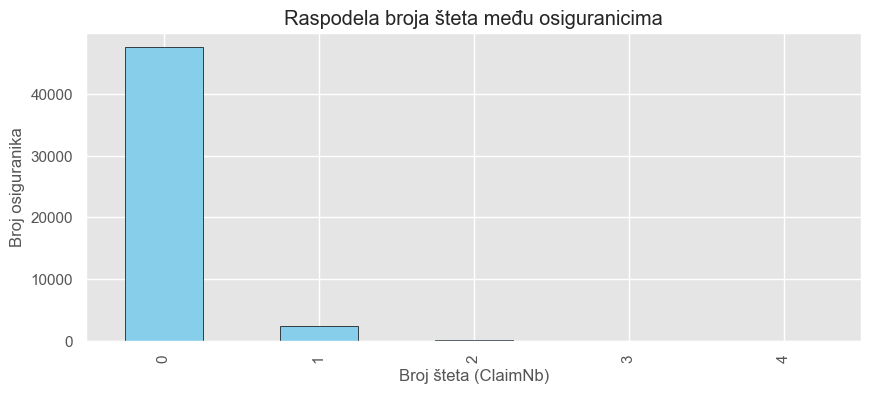

In [67]:
plt.figure(figsize=(10, 4))
df['ClaimNb'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Broj šteta (ClaimNb)')
plt.ylabel('Broj osiguranika')
plt.title('Raspodela broja šteta među osiguranicima')
plt.grid(True)
plt.show()

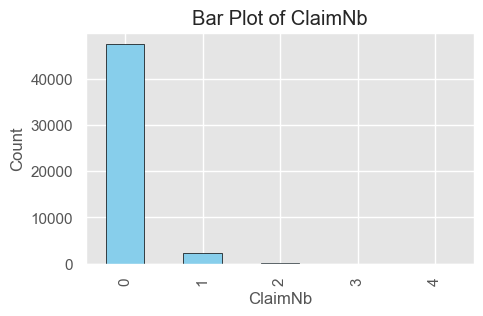

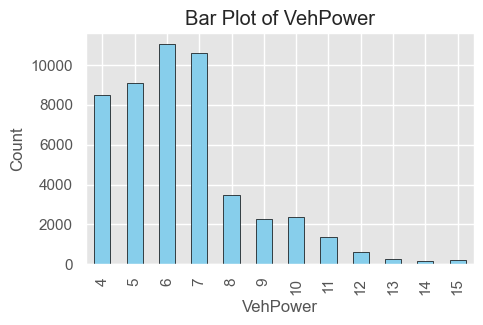

In [68]:
# Iscrtavanje stubičastih grafikona sa skevnošću za svaki diskretni atribut
for feature in discrete_features:
    data = df[feature].dropna()
    # Plot bar plot
    plt.figure(figsize=(5, 3))
    data.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of {feature}')
    plt.show()
    plt.close()  # Zatvori grafikone da bi izbegao preklapanje

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


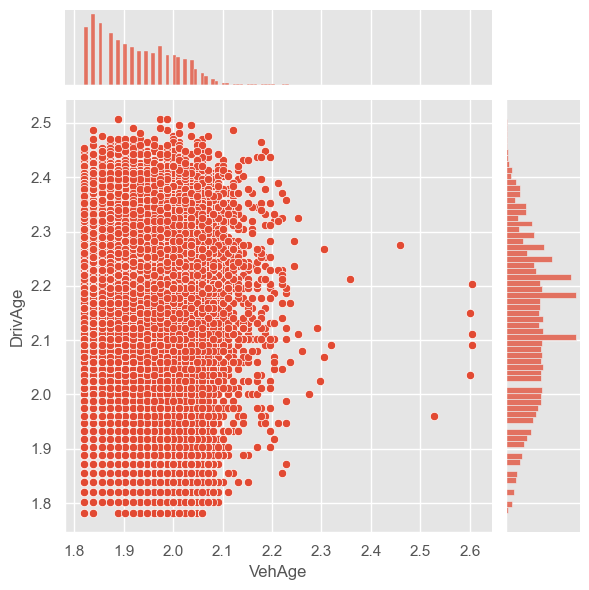

In [69]:
data = df.copy()

# Primeni transformaciju pete korene
data['VehAge'] = np.abs(data['VehAge']+20)**(1/5)  # Primeni transformaciju pete korene
data['DrivAge'] = np.abs(data['DrivAge'])**(1/5)  # Primeni transformaciju pete korene

# Kreiraj zajednički grafikon (joint plot)
sns.jointplot(x='VehAge', y='DrivAge', data=data)

plt.show()

<p style="font-size:16px;"> Možemo primetiti da mlađi vozači nešto više preferiraju novija vozila. </p>

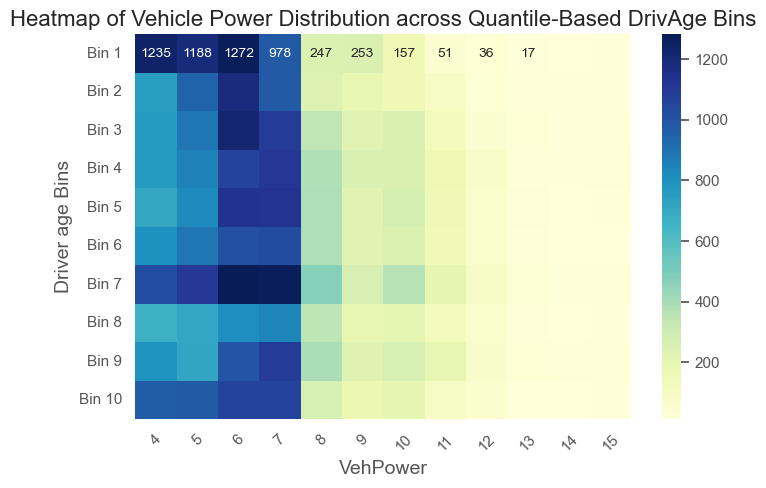

In [70]:
# Copy data
data = df.copy()

# Bin 'IDpol' into quantiles with approximately equal number of elements
data['DrivAge'] = pd.qcut(data['DrivAge'], q=10, labels=[f'Bin {i+1}' for i in range(10)])

# Create a DataFrame for the heatmap
heatmap_data = data.groupby(['DrivAge', 'VehPower'], observed=True).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar=True)

plt.xlabel('VehPower', fontsize=14)
plt.ylabel('Driver age Bins', fontsize=14)
plt.title('Heatmap of Vehicle Power Distribution across Quantile-Based DrivAge Bins', fontsize=16)
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.yticks(rotation=0)   # Rotate y labels if needed
plt.show()

<p style="font-size:16px;"> Snaga vozila ima blagu pozitivnu povezanost sa starošću vozača. </p>

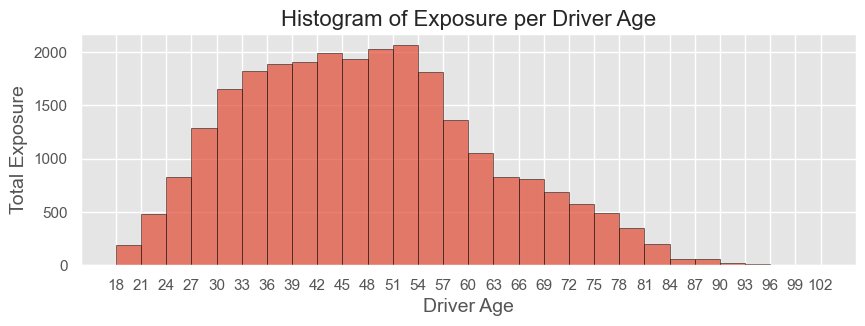

In [71]:
# Plotting
plt.figure(figsize=(10, 3))

# Plot histogram of exposure per driver age
plt.hist(df['DrivAge'], weights=df['Exposure'], bins=range(min(df['DrivAge']), max(df['DrivAge']) + 5, 3), edgecolor='black', alpha=0.7)

plt.xlabel('Driver Age', fontsize=14)
plt.ylabel('Total Exposure', fontsize=14)
plt.title('Histogram of Exposure per Driver Age', fontsize=16)
plt.xticks(range(min(df['DrivAge']), max(df['DrivAge']) + 5, 3))
plt.grid(True)
plt.show()


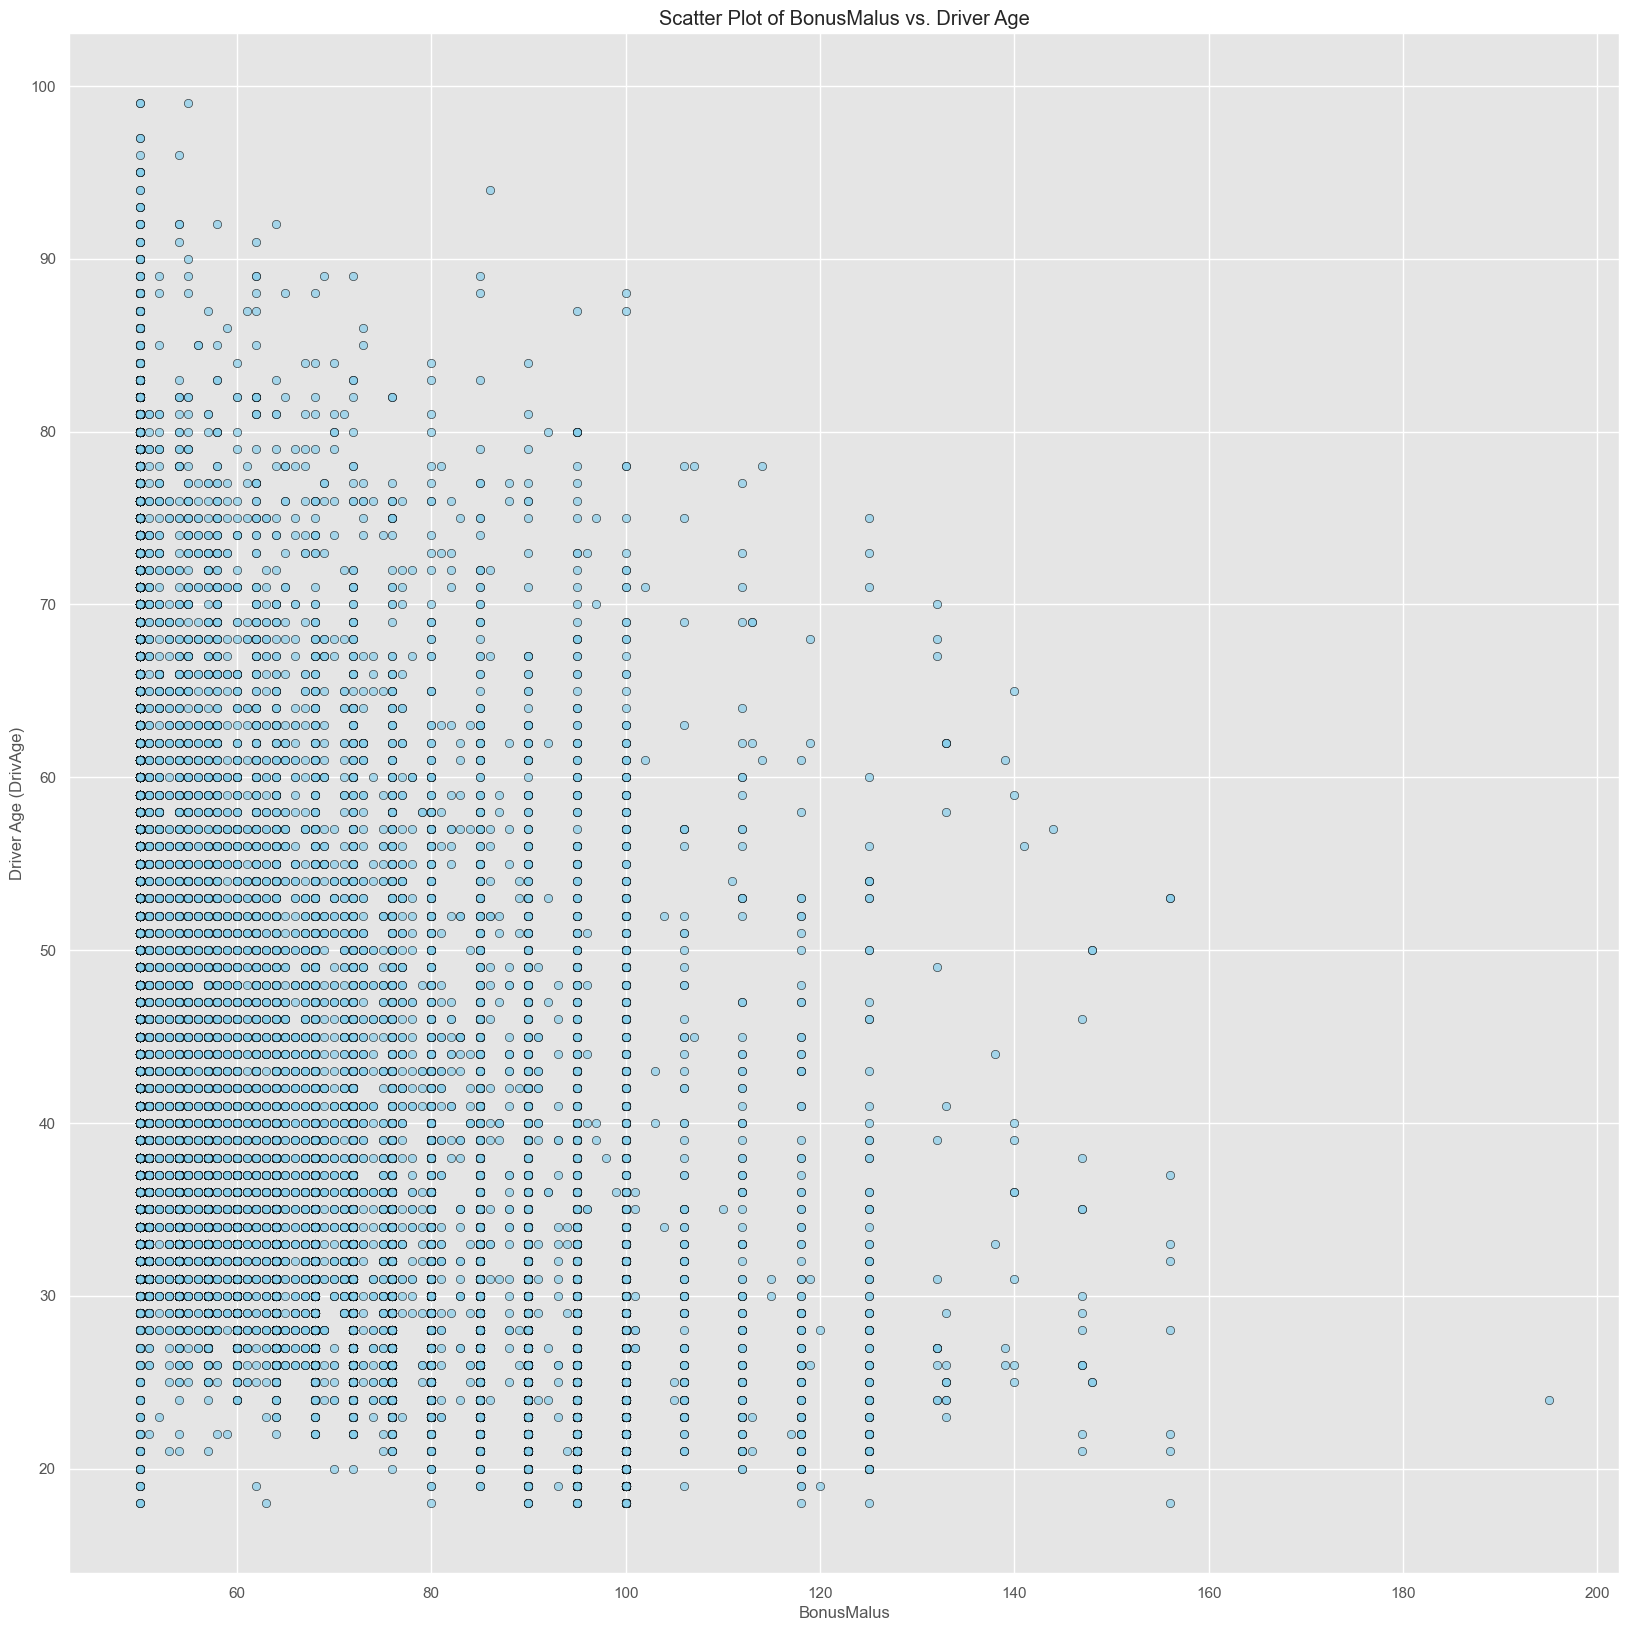

In [72]:
# Scatter plot
plt.figure(figsize=(20, 20))
plt.scatter(df['BonusMalus'], df['DrivAge'], color='skyblue', edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel('BonusMalus')
plt.ylabel('Driver Age (DrivAge)')
plt.title('Scatter Plot of BonusMalus vs. Driver Age')
plt.grid(True)
plt.show()

<p style="font-size:16px;"> Jasno možemo uočiti negativnu vezu između nivoa bonus-malus i starosti vozača, što ukazuje da stariji vozači obično imaju niži nivo bonus-malus. </p>

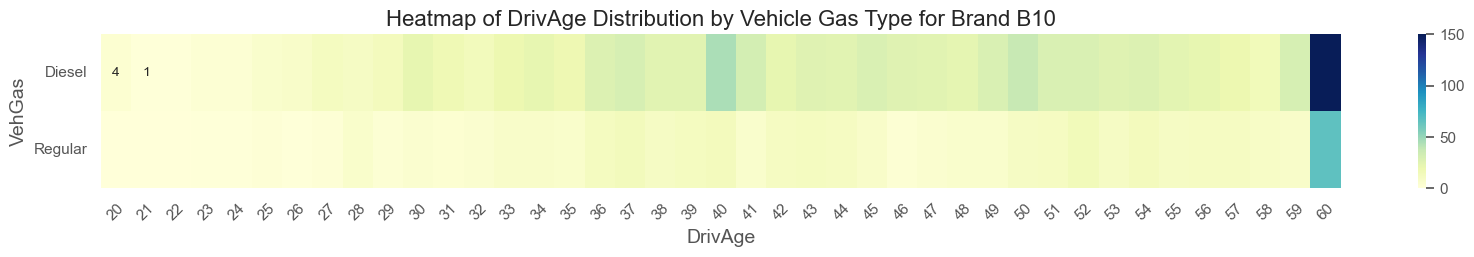

In [73]:
# Filter data for VehBrand B10
data_b10 = df[df['VehBrand'] == 'B10'].copy()

# Cap DrivAge at 60
data_b10['DrivAge'] = np.where(data_b10['DrivAge'] > 60, 60, data_b10['DrivAge'])

# Create a pivot table
pivot_table = data_b10.pivot_table(index='VehGas', columns='DrivAge', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 2))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d', cbar=True)
plt.xlabel('DrivAge', fontsize=14)
plt.ylabel('VehGas', fontsize=14)
plt.title('Heatmap of DrivAge Distribution by Vehicle Gas Type for Brand B10', fontsize=16)
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.yticks(rotation=0)   # Rotate y labels if needed
plt.show()

<p style="font-size:16px;"> Možemo pretpostaviti da je marka B10 najverovatnije dizel vozilo koje voze starije osobe. </p>

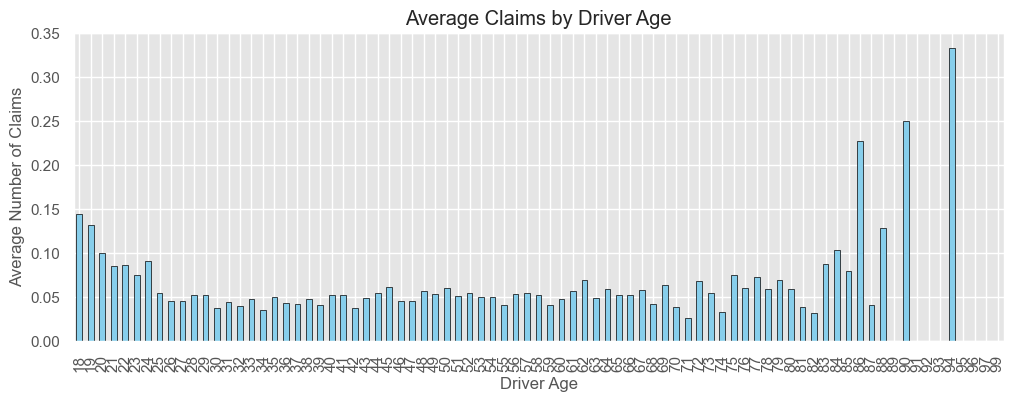

In [74]:
# prosečan broj šteta po grupi starosti vozača

plt.figure(figsize=(12,4))
df.groupby('DrivAge')['ClaimNb'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Driver Age')
plt.ylabel('Average Number of Claims')
plt.title('Average Claims by Driver Age')
plt.show()

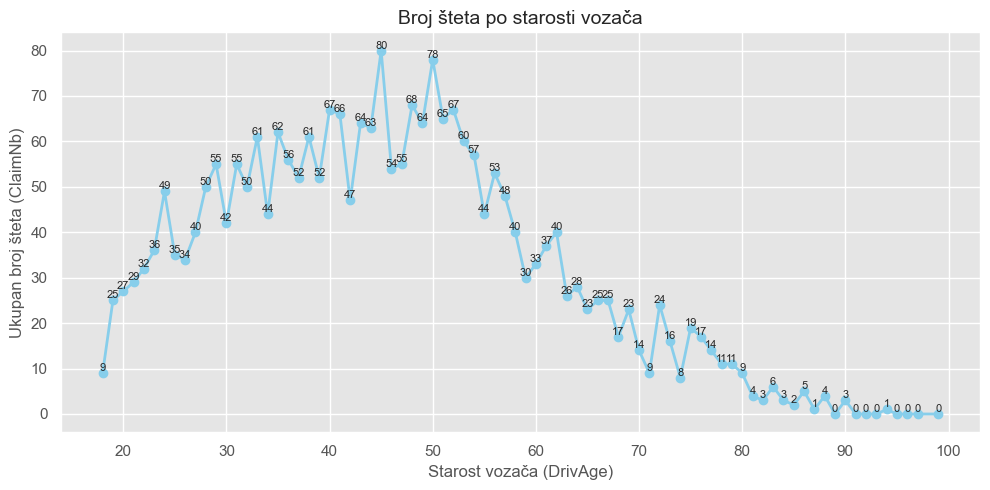

In [75]:
# Broj nesreća po starosti vozača (linijski grafikon)

# Prvo grupišemo podatke po starosti vozača
claims_per_age = df.groupby('DrivAge')['ClaimNb'].sum().reset_index()

# Crtanje grafikona
plt.figure(figsize=(10, 5))
plt.plot(claims_per_age['DrivAge'], claims_per_age['ClaimNb'], marker='o', linestyle='-', color='skyblue', linewidth=2, label='Broj nesreća')

# Dodavanje vrednosti iznad tačaka
for i in range(len(claims_per_age)):
    plt.text(claims_per_age['DrivAge'][i], claims_per_age['ClaimNb'][i], 
             int(claims_per_age['ClaimNb'][i]), ha='center', va='bottom', fontsize=8)

# Podešavanja izgleda
plt.title('Broj šteta po starosti vozača', fontsize=14)
plt.xlabel('Starost vozača (DrivAge)', fontsize=12)
plt.ylabel('Ukupan broj šteta (ClaimNb)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


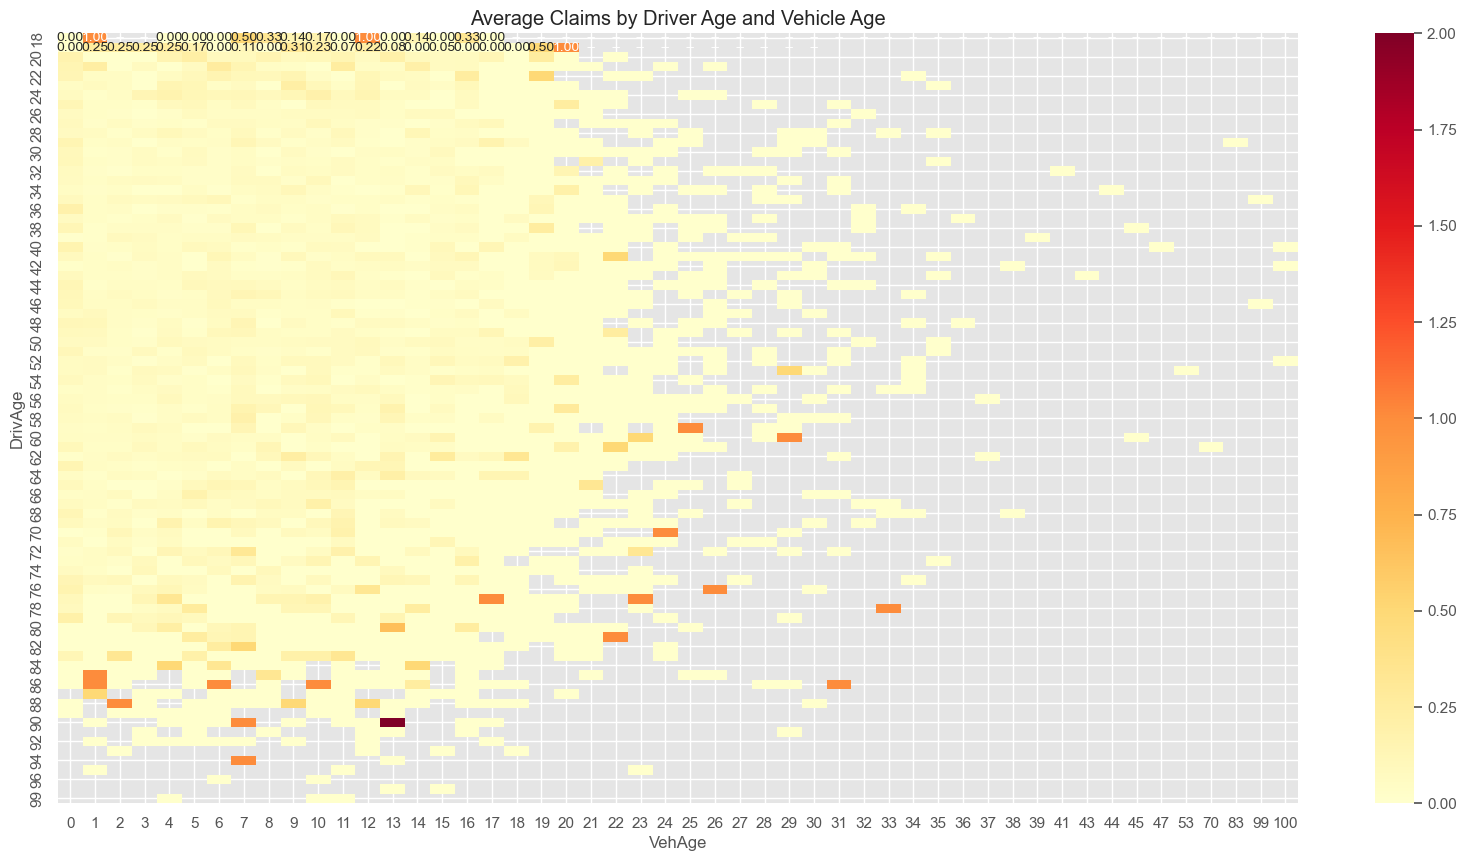

In [76]:
#Kako starost vozača i vozila zajedno utiču na broj šteta

pivot = df.pivot_table(index='DrivAge', columns='VehAge', values='ClaimNb', aggfunc='mean')
plt.figure(figsize=(20,10))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt=".2f")
plt.title('Average Claims by Driver Age and Vehicle Age')
plt.show()

    DrivAge  Number of Claims
27       45                80
32       50                78
30       48                68
34       52                67
22       40                67
23       41                66
33       51                65
25       43                64
31       49                64
26       44                63


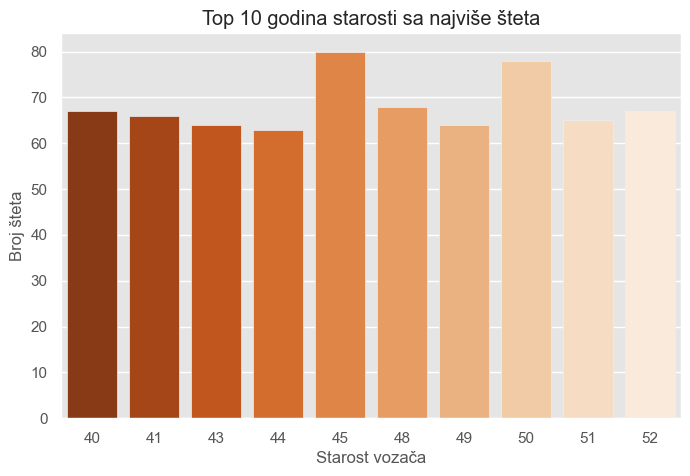

In [77]:
# Top 10 godina starosti sa najviše šteta

# Grupisanje: broj šteta po godini starosti vozača
claims_by_age = df.groupby('DrivAge')['ClaimNb'].sum().reset_index(name='Number of Claims')

# Sortiraj po broju šteta i uzmi 10 najgorih godina
top_10_ages = claims_by_age.sort_values(by='Number of Claims', ascending=False).head(10)

# Prikaz rezultata
print(top_10_ages)

# Bar grafikon
plt.figure(figsize=(8, 5))
sns.barplot(data=top_10_ages, x='DrivAge', y='Number of Claims', palette='Oranges_r')
plt.title('Top 10 godina starosti sa najviše šteta')
plt.xlabel('Starost vozača')
plt.ylabel('Broj šteta')
plt.show()

In [78]:
# Najčešći modeli automobila (npr. VehBrand) sa najviše nesreća

# Grupisanje po brendu i računanje ukupnog broja šteta
brand_claims = df.groupby('VehBrand')['ClaimNb'].agg(['count', 'sum']).reset_index()
brand_claims.columns = ['VehBrand', 'Number of Vehicles', 'Total Claims']

# Dodaj prosečan broj šteta po vozilu
brand_claims['Avg Claims per Vehicle'] = brand_claims['Total Claims'] / brand_claims['Number of Vehicles']

# Sortiranje po prosečnom broju šteta
brand_claims_sorted = brand_claims.sort_values(by='Avg Claims per Vehicle', ascending=False)

# Prikaz
print(brand_claims_sorted.head(10))


   VehBrand  Number of Vehicles  Total Claims  Avg Claims per Vehicle
2       B11                1017            72                0.070796
4       B13                 866            54                0.062356
9        B5                2589           156                0.060255
7        B3                3895           223                0.057253
8        B4                1910           104                0.054450
1       B10                1327            71                0.053504
0        B1               11958           622                0.052015
6        B2               11773           605                0.051389
10       B6                2061            99                0.048035
3       B12               12305           568                0.046160


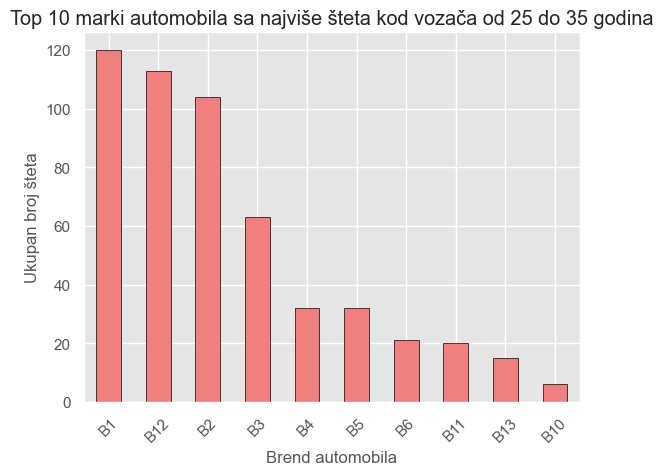

In [79]:
# Najčešće marke automobila u nesrećama po starosti vozača

# Grupisanje po brendu vozila i starosti vozača
brand_age_claims = df.groupby(['VehBrand', 'DrivAge'])['ClaimNb'].sum().reset_index()

# Npr. filtriraj starost od 25 do 35 godina
young_drivers = brand_age_claims[(brand_age_claims['DrivAge'] >= 25) & (brand_age_claims['DrivAge'] <= 35)]

# Prikaži top 10 brendova sa najviše šteta među mladim vozačima
top_young_driver_brands = young_drivers.groupby('VehBrand')['ClaimNb'].sum().sort_values(ascending=False).head(10)

# Vizualizacija
top_young_driver_brands.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 marki automobila sa najviše šteta kod vozača od 25 do 35 godina')
plt.xlabel('Brend automobila')
plt.ylabel('Ukupan broj šteta')
plt.xticks(rotation=45)
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37064\1323724038.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gas_group_claims = df.groupby(['VehGas', 'AgeGroup'])['ClaimNb'].sum().unstack(fill_value=0)


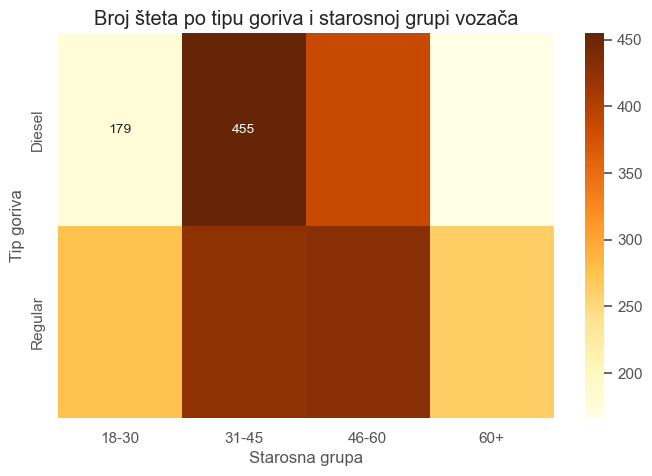

In [80]:
# Popularnost tipa goriva (VehGas) po štetama i starosnim grupama

# Grupisanje po tipu goriva i grupi godina vozača
df['AgeGroup'] = pd.cut(df['DrivAge'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])

gas_group_claims = df.groupby(['VehGas', 'AgeGroup'])['ClaimNb'].sum().unstack(fill_value=0)

# Prikaz heatmape
plt.figure(figsize=(8, 5))
sns.heatmap(gas_group_claims, annot=True, cmap='YlOrBr', fmt='d')
plt.title('Broj šteta po tipu goriva i starosnoj grupi vozača')
plt.xlabel('Starosna grupa')
plt.ylabel('Tip goriva')
plt.show()


In [81]:
#Provjera ispravnosti vrijednosti u ostalim kolonama

categorical_features = [col for col in df.columns if df[col].dtype == 'O']

for col in categorical_features:
    print(f"{col}: {df[col].unique()}")

print(df.describe())  # već koristiš ovo – OK je

# Dodatno: gledaj negativne vrednosti tamo gde ne bi smele da budu
print(df[df['DrivAge'] < 0])  # Starost ne sme biti negativna
print(df[df['VehAge'] < 0])   # Vozilo ne bi trebalo da ima negativne godine

print(df['VehGas'].value_counts())  # vidi sve vrednosti i njihov broj

# Možeš i filtrirati neuobičajene vrednosti
print(df[~df['VehGas'].isin(['Diesel', 'Regular', 'Premium'])])

print(df.isnull().sum())

print((df['Exposure'] == 0).sum())

#vidimo da za na primer pol ima muski, i nan, pa to nan moramo da zamenimo sa necim (npr. nepoznato)

Area: ['D' 'E' 'A' 'C' 'B' 'F']
VehBrand: ['B1' 'B2' 'B6' 'B13' 'B11' 'B5' 'B12' 'B3' 'B10' 'B4' 'B14']
VehGas: ['Regular' 'Diesel']
Region: ['R24' 'R25' 'R82' 'R53' 'R54' 'R11' 'R94' 'R93' 'R91' 'R52' 'R72' 'R31'
 'R73' 'R23' 'R22' 'R41' 'R42' 'R83' 'R21' 'R26' 'R74' 'R43']
            ClaimNb      Exposure      VehPower       VehAge       DrivAge  \
count  50000.000000  50000.000000  50000.000000  50000.00000  50000.000000   
mean       0.051740      0.527685      6.467920      7.03714     45.503720   
std        0.235338      0.364206      2.062168      5.64776     14.136784   
min        0.000000      0.002732      4.000000      0.00000     18.000000   
25%        0.000000      0.170000      5.000000      2.00000     34.000000   
50%        0.000000      0.490000      6.000000      6.00000     44.000000   
75%        0.000000      0.980000      7.000000     11.00000     55.000000   
max        4.000000      2.010000     15.000000    100.00000     99.000000   

         BonusMalus  

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37064\1876207568.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age = df.groupby('AgeGroup')['ClaimNb'].mean().reset_index()


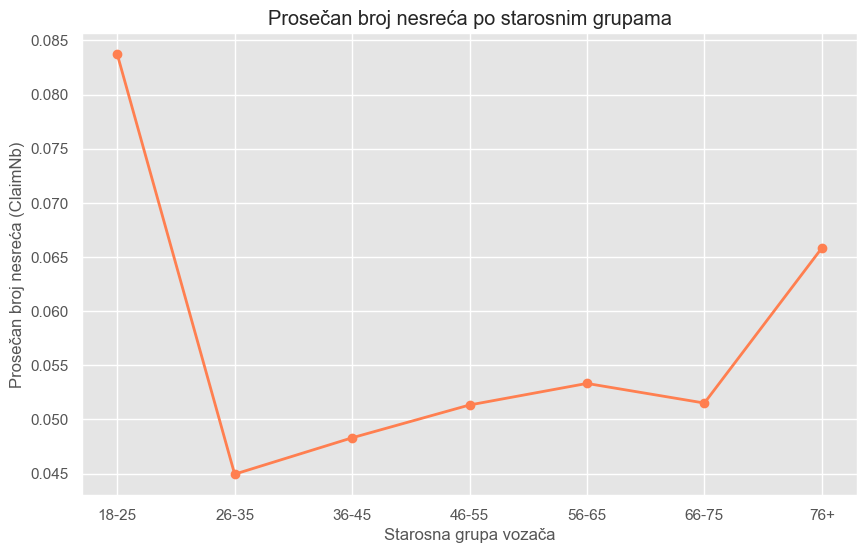

In [82]:
#grafik za broj nesreca zanrova po starosti 

# Kreiranje starosnih grupa
bins = [17, 25, 35, 45, 55, 65, 75, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']
df['AgeGroup'] = pd.cut(df['DrivAge'], bins=bins, labels=labels)

# Grupisanje po starosnim grupama i izračunavanje prosečnog broja nesreća
grouped_age = df.groupby('AgeGroup')['ClaimNb'].mean().reset_index()

# Crtanje grafikona
plt.figure(figsize=(10, 6))
plt.plot(grouped_age['AgeGroup'], grouped_age['ClaimNb'], marker='o', color='coral', linewidth=2)
plt.title('Prosečan broj nesreća po starosnim grupama')
plt.xlabel('Starosna grupa vozača')
plt.ylabel('Prosečan broj nesreća (ClaimNb)')
plt.grid(True)
plt.show()


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


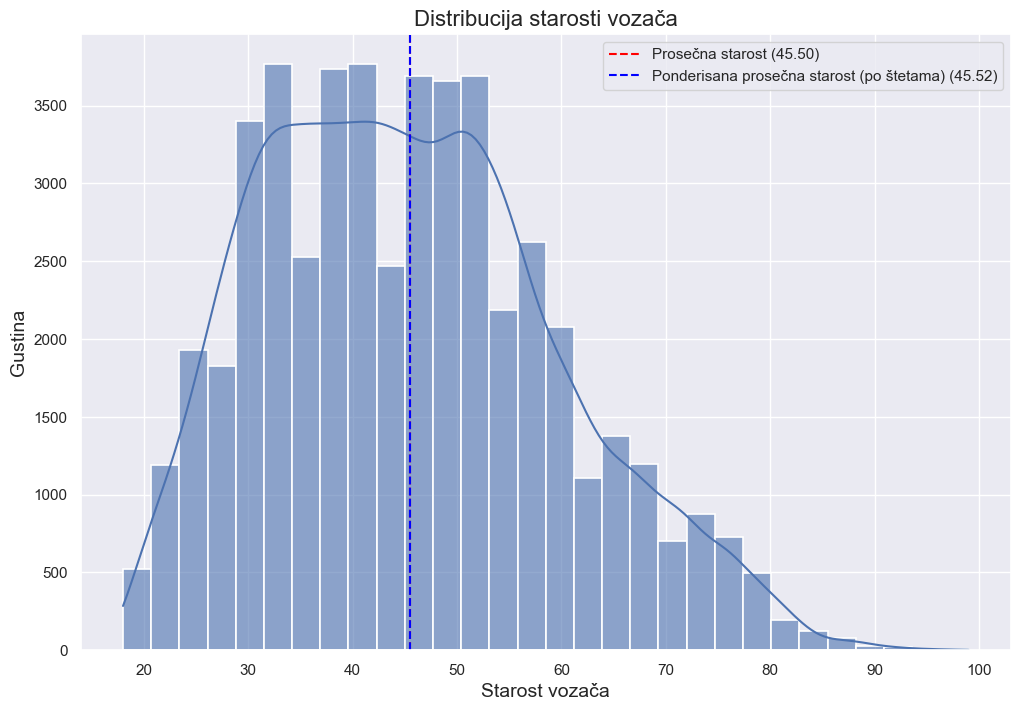

In [83]:
# prosečne starosti vozača u odnosu na broj nesreća

# Izračunavanje prosečne starosti vozača (ponderisano brojem nesreća)
# Pretpostavka: ako želiš prosečnu starost svih vozača
mean_age = df['DrivAge'].mean()

# Ako želiš prosečnu starost ponderisanu brojem nesreća (npr. "težinska" starost vozača kod kojih su se dogodile nesreće)
mean_age_weighted = np.average(df['DrivAge'], weights=df['ClaimNb'] + 1e-6)  # dodajemo mali broj da ne bude težina 0

sns.set_theme()
plt.figure(figsize=(12,8))

# Histogram starosti vozača
sns.histplot(df['DrivAge'], bins=30, kde=True, edgecolor='white', linewidth=1.2, alpha=0.6)

plt.title('Distribucija starosti vozača', fontsize=16)
plt.xlabel('Starost vozača', fontsize=14)
plt.ylabel('Gustina', fontsize=14)

# Crtanje linije prosečne starosti
plt.axvline(x=mean_age, color='red', linestyle='--', label=f'Prosečna starost ({mean_age:.2f})')

# Crtanje linije ponderisane prosečne starosti (po nesrećama)
plt.axvline(x=mean_age_weighted, color='blue', linestyle='--', label=f'Ponderisana prosečna starost (po štetama) ({mean_age_weighted:.2f})')

plt.legend()
plt.show()

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

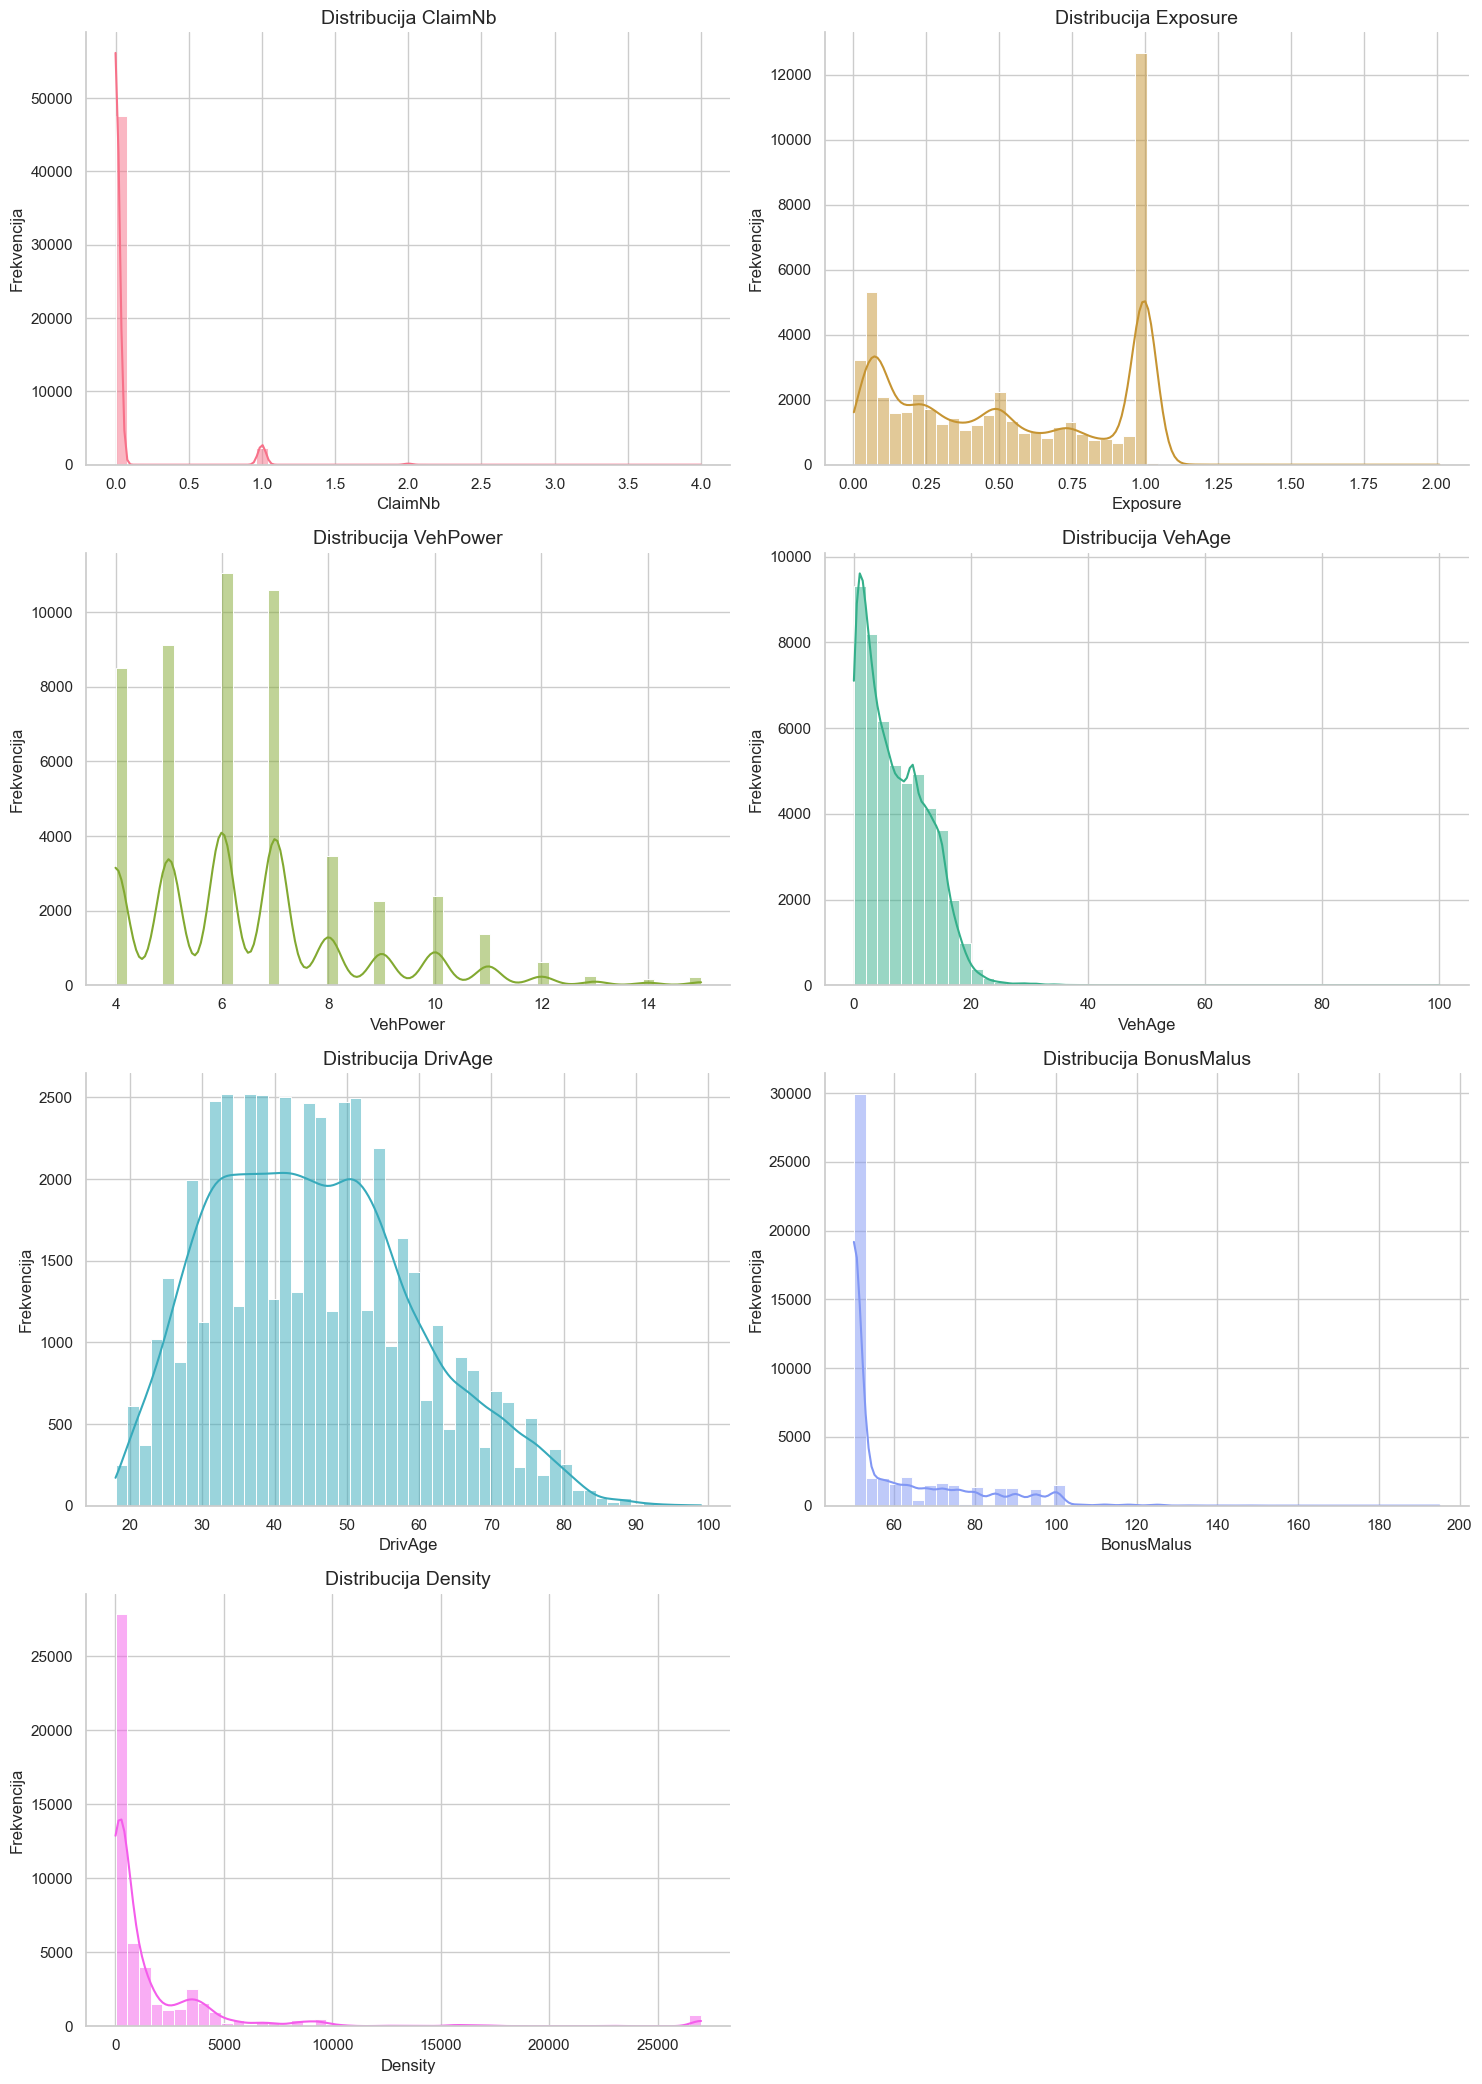

In [84]:
#Grafici karakteristike

sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

numeric_labels = ['ClaimNb', 'Exposure', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']
colors = sns.color_palette("husl", len(numeric_labels))

fig, axes = plt.subplots(len(numeric_labels)//2 + len(numeric_labels)%2, 2, figsize=(15, len(numeric_labels)*3))

for i, (label, color) in enumerate(zip(numeric_labels, colors)):
    ax = axes[i // 2, i % 2]
    sns.histplot(data=df, x=label, ax=ax, color=color, kde=True, bins=50)
    ax.set_title(f'Distribucija {label}', fontsize=14)
    ax.set_xlabel(label, fontsize=12)
    ax.set_ylabel('Frekvencija', fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Uklanjanje praznih podzapreka ako ih ima (u slučaju neparnog broja grafikona)
if len(numeric_labels) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.savefig("karakteristike_distribucije.png", dpi=300, bbox_inches='tight')
plt.show()

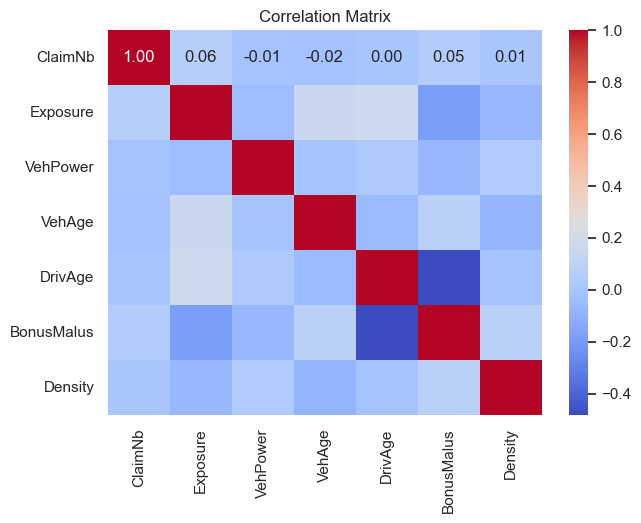

In [85]:
#korelaciona matrica

plt.figure(figsize=(7,5))
numerical_df = df.select_dtypes(include=[np.number])  # samo numeričke kolone
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


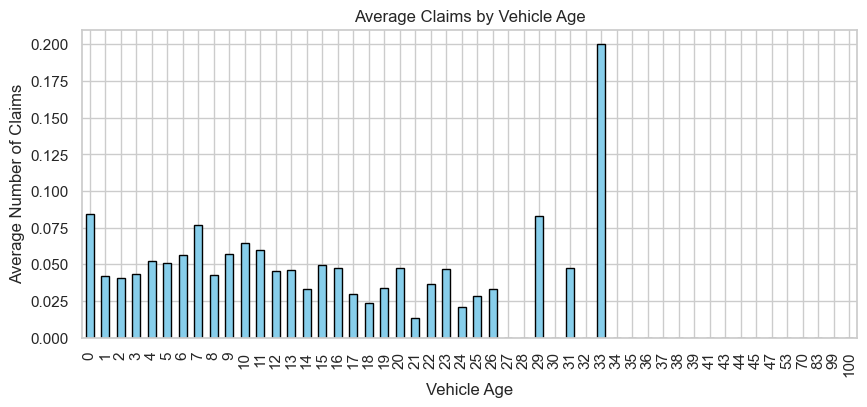

In [86]:
#  Prosečan broj šteta po starosti vozila (VehAge)

plt.figure(figsize=(10,4))
df.groupby('VehAge')['ClaimNb'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Vehicle Age')
plt.ylabel('Average Number of Claims')
plt.title('Average Claims by Vehicle Age')
plt.show()

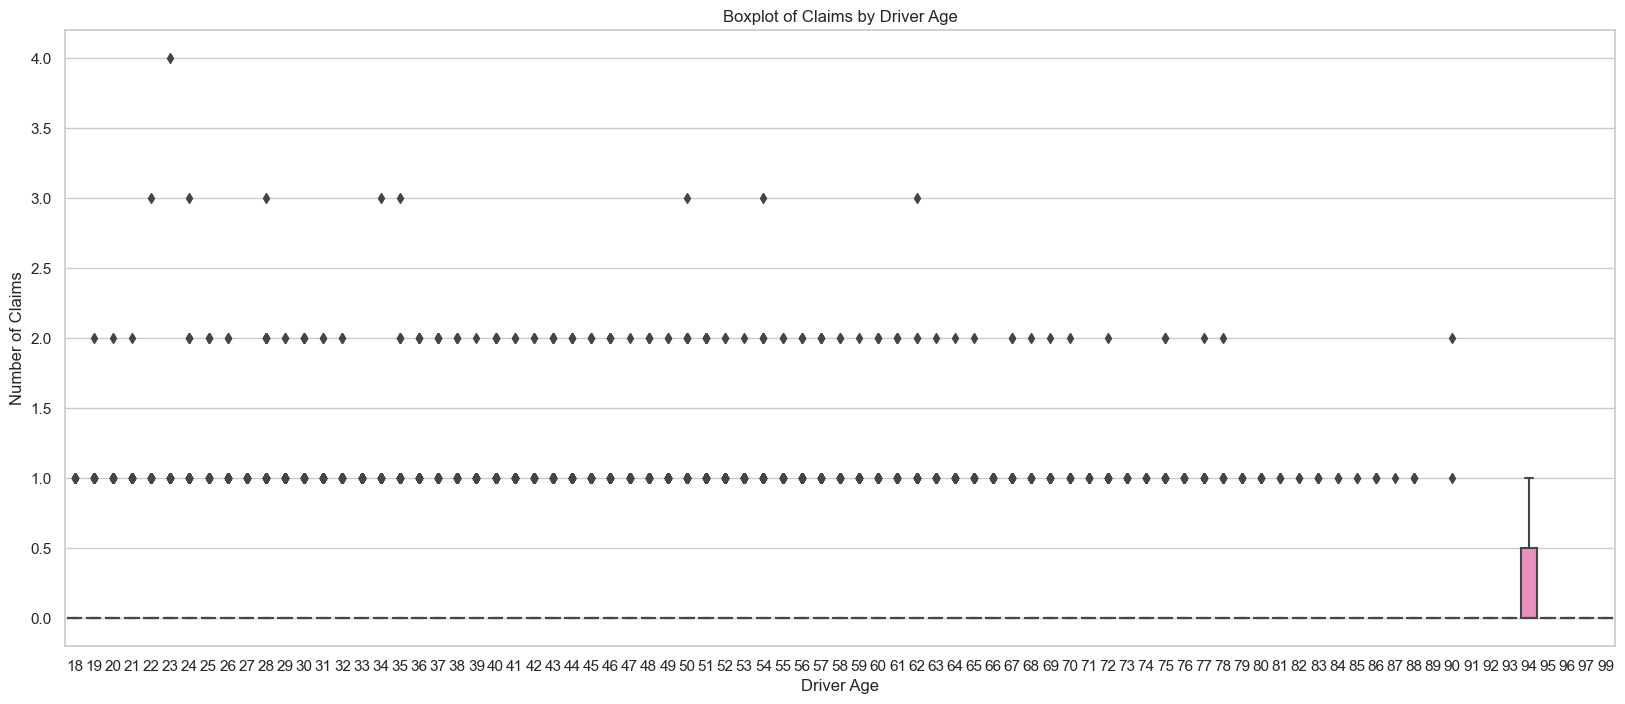

In [87]:
# Boxplot raspodele broja šteta po starosnim grupama vozača (DrivAge)

plt.figure(figsize=(20,8))
sns.boxplot(x='DrivAge', y='ClaimNb', data=df)
plt.xlabel('Driver Age')
plt.ylabel('Number of Claims')
plt.title('Boxplot of Claims by Driver Age')
plt.show()

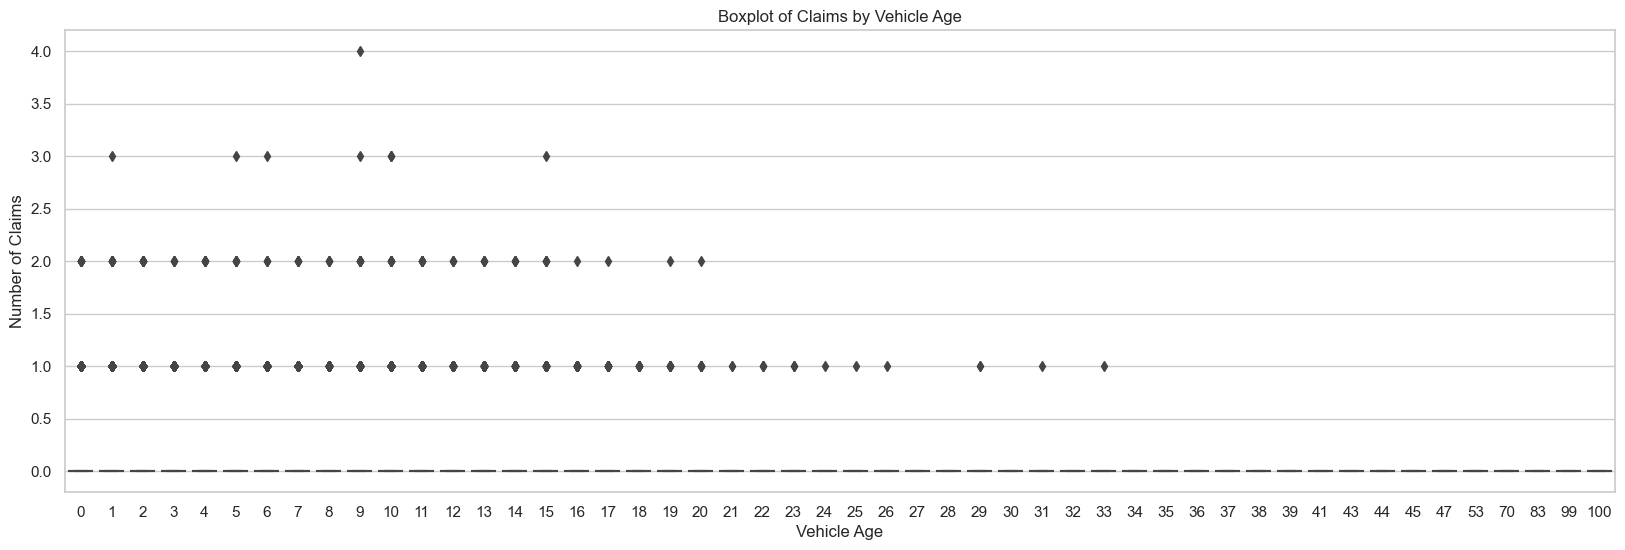

In [88]:
# Boxplot raspodele broja šteta po VehAge

plt.figure(figsize=(20,6))
sns.boxplot(x='VehAge', y='ClaimNb', data=df)
plt.xlabel('Vehicle Age')
plt.ylabel('Number of Claims')
plt.title('Boxplot of Claims by Vehicle Age')
plt.show()

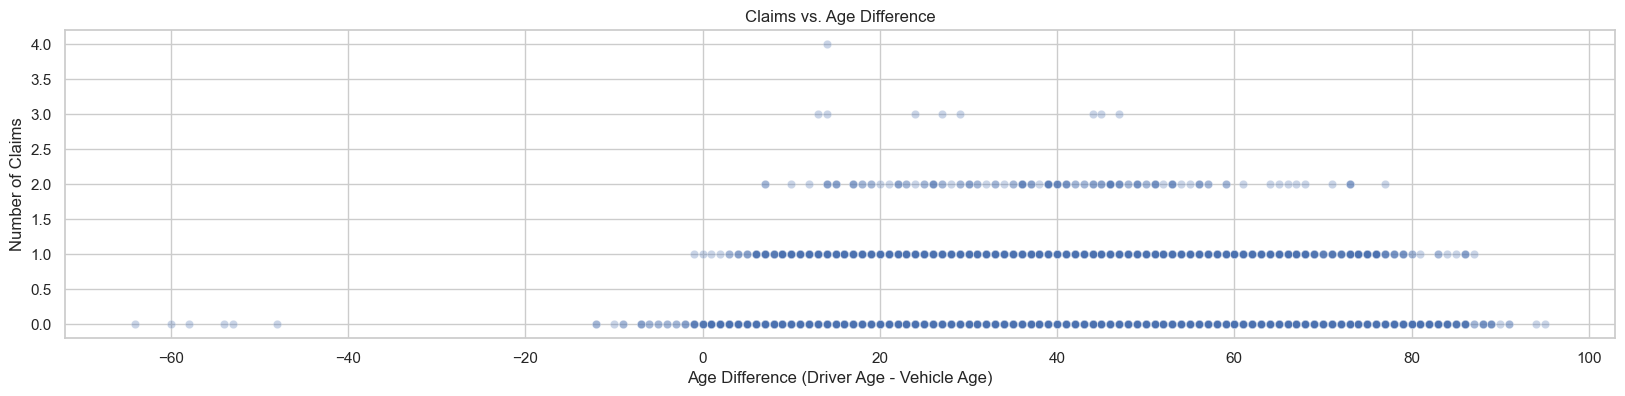

In [89]:
#  Feature engineering - razlika starosti (AgeDiff)

df['AgeDiff'] = df['DrivAge'] - df['VehAge']

plt.figure(figsize=(20,4))
sns.scatterplot(x='AgeDiff', y='ClaimNb', data=df, alpha=0.3)
plt.xlabel('Age Difference (Driver Age - Vehicle Age)')
plt.ylabel('Number of Claims')
plt.title('Claims vs. Age Difference')
plt.show()


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


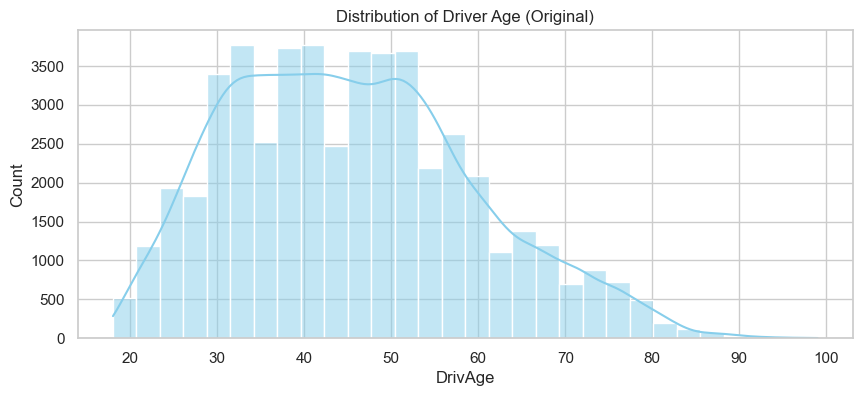

In [90]:
# Uporedi distribuciju pre i posle transformacije petog korena za DrivAge

#Prvo bez transformacije:

plt.figure(figsize=(10,4))
sns.histplot(df['DrivAge'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Driver Age (Original)')
plt.show()


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


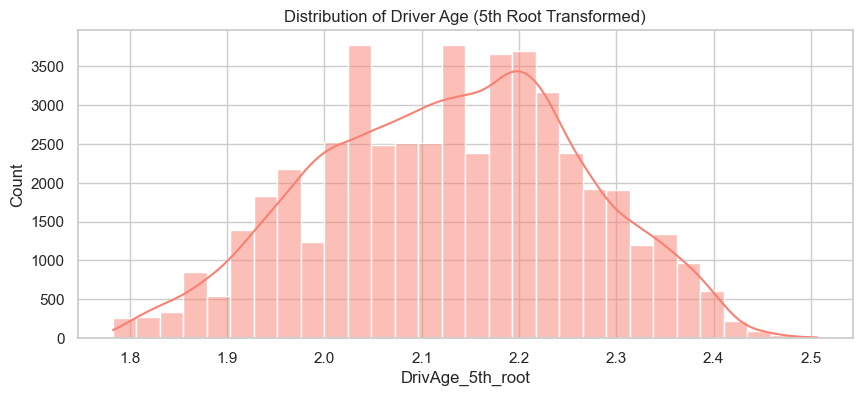

In [91]:
#Pa posle transformacije koju si radio:

data = df.copy()
data['DrivAge_5th_root'] = np.abs(data['DrivAge'])**(1/5)

plt.figure(figsize=(10,4))
sns.histplot(data['DrivAge_5th_root'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Driver Age (5th Root Transformed)')
plt.show()


c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

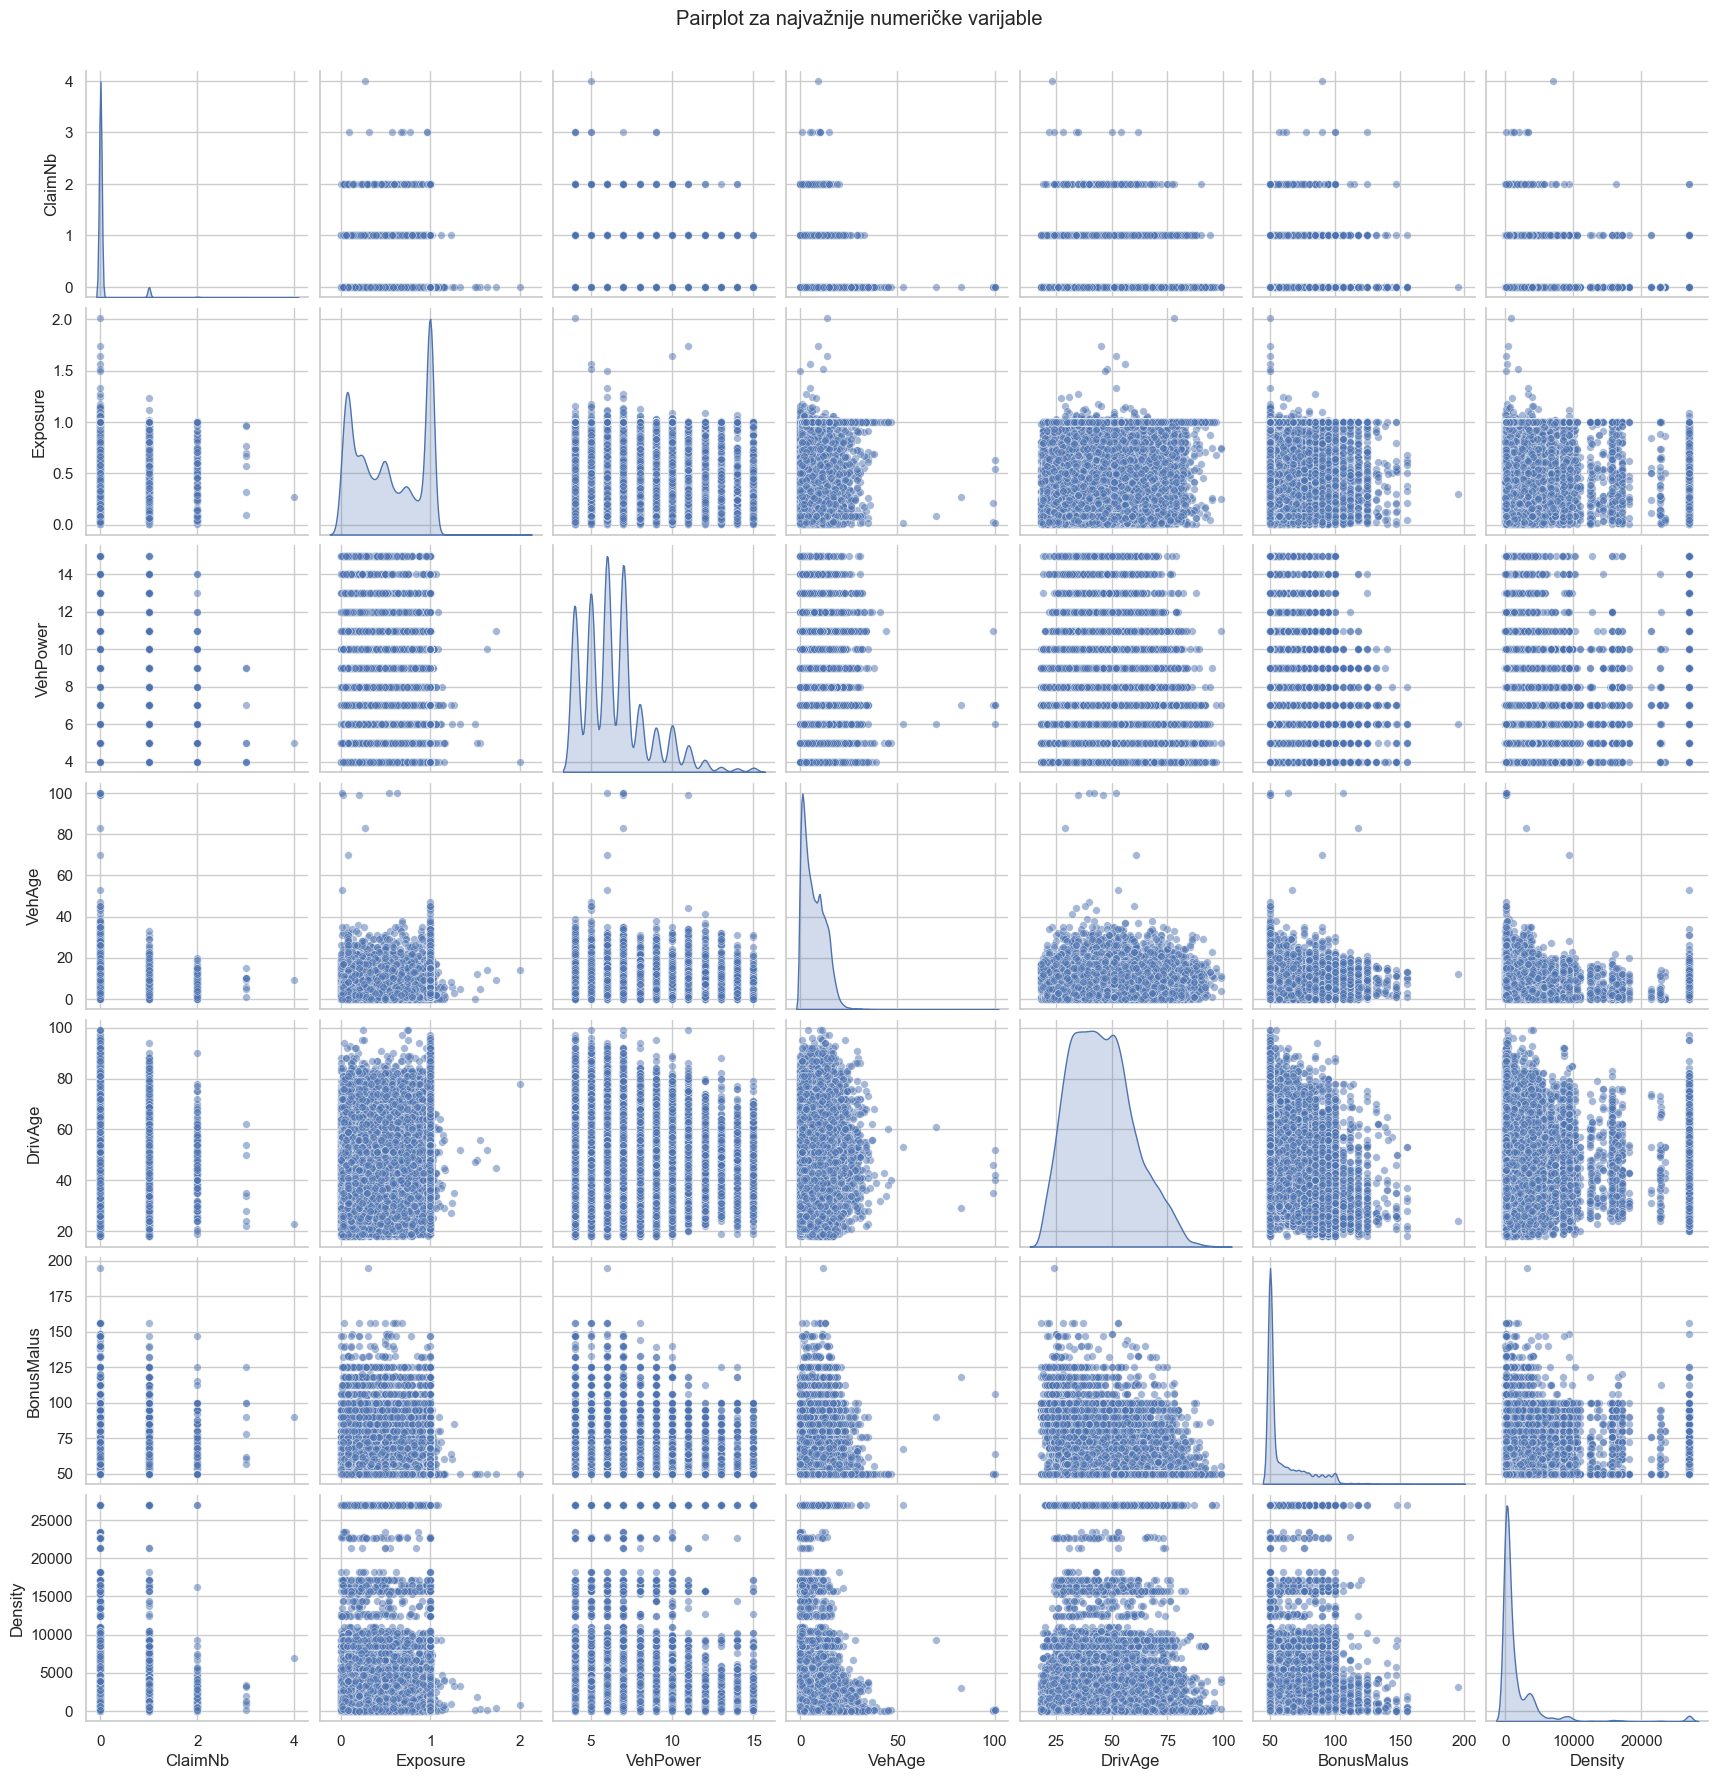

In [92]:
# Scatter plot matrica (pairplot) za najvažnije numeričke varijable
sns.pairplot(df[numeric_labels], diag_kind='kde', plot_kws={'alpha':0.5, 's':30})
plt.suptitle('Pairplot za najvažnije numeričke varijable', y=1.02)
plt.show()
